# Figure 2: Difference in Performance between different number of samples per site

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
df = pd.read_csv('../outputs/fig2_1000samples.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,9.262602,8.569012,18.591303,4.912843,50,10,5,50,80,0.0,0.70,G,NaN,True
1,0,3.550049,3.329932,6.731394,1.786979,50,10,5,40,0,0.0,0.25,G,NaN,True
2,0,4.143934,3.826896,8.332449,2.255006,50,10,5,90,30,0.0,0.30,G,NaN,True
3,0,4.139856,3.824701,7.952438,2.188650,50,10,5,30,20,0.0,0.20,G,NaN,True
4,0,10.203641,9.261084,20.864174,5.602711,50,50,1,20,60,0.0,0.40,G,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0,10.095548,9.410594,20.581676,5.511299,50,50,1,70,70,0.0,0.45,G,NaN,False
2876,0,5.842664,5.153486,12.375832,3.571008,50,50,1,50,0,0.0,0.35,G,NaN,False
2877,0,23.483899,20.085727,51.215433,15.056297,50,50,1,70,40,0.0,0.75,G,NaN,False
2878,0,4.416673,4.110313,8.530854,2.367333,50,50,1,70,70,0.0,0.10,G,NaN,False


Let's pick just one entry of the array (`kappa_within_site` and `latitude`) and see the different performances as a function of `outlier rate`.

In [3]:
def critical_outlier_rate(df_, kappa_within_site, site_lat):
    
    df_subset = df_[(df_.kappa_within_site==kappa_within_site) & (df_.site_lat==site_lat)]

    df1 = df_subset[df.k==1].sort_values(by="outlier_rate")
    df5 = df_subset[df.k==5].sort_values(by="outlier_rate")
    
    outlier_rate = df1.outlier_rate
    error_1 = df1.error_angle_mean.values
    error_5 = df5.error_angle_mean.values
    error_diff = error_1 - error_5
    
    roots = InterpolatedUnivariateSpline(outlier_rate, error_diff).roots()
    
    assert len(roots) == 1
    return roots[0]

In [4]:
all_kappa_within_site = sorted(np.unique(df.kappa_within_site))
all_site_lat = sorted(np.unique(df.site_lat))

n_kappa_within_site = len(all_kappa_within_site)
n_site_lat = len(all_site_lat)

Critical_outlier_rate = np.zeros((n_site_lat, n_kappa_within_site))

for i in range(n_site_lat):
    for j in range(n_kappa_within_site):
        _df_critical = pd.DataFrame({"site_lat": [all_site_lat[i]],
                                      "kappa_within_site": [all_kappa_within_site[j]],
                                      "critical": critical_outlier_rate(df, kappa_within_site=all_kappa_within_site[j], site_lat=all_site_lat[i])})
        if i==0 and j==0:
            df_critical = _df_critical
        else:
            df_critical = pd.concat([df_critical, _df_critical], axis=0, ignore_index=True)
        # Critical_outlier_rate[i,j] = critical_outlier_rate(df, kappa_within_site=all_kappa_within_site[j], site_lat=all_site_lat[i])

/tmp/ipykernel_6012/1425717079.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_subset[df.k==1].sort_values(by="outlier_rate")
/tmp/ipykernel_6012/1425717079.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df_subset[df.k==5].sort_values(by="outlier_rate")


In [19]:
np.round(df_critical.pivot('site_lat', 'kappa_within_site', 'critical'), decimals=2)

kappa_within_site,10,20,30,40,50,60,70,80,90,100
site_lat,,,,,,,,,,
0,0.16,0.17,0.16,0.16,0.16,0.17,0.16,0.15,0.17,0.16
10,0.17,0.17,0.17,0.17,0.18,0.17,0.16,0.16,0.18,0.18
20,0.13,0.17,0.17,0.17,0.16,0.18,0.18,0.18,0.18,0.18
30,0.14,0.17,0.17,0.19,0.21,0.20,0.21,0.19,0.21,0.20
40,0.11,0.20,0.21,0.20,0.22,0.20,0.23,0.22,0.22,0.21
50,0.18,0.23,0.22,0.24,0.23,0.23,0.24,0.23,0.24,0.24
60,0.20,0.25,0.25,0.24,0.25,0.27,0.26,0.26,0.28,0.26
70,0.22,0.26,0.27,0.25,0.26,0.29,0.29,0.28,0.29,0.30
80,0.28,0.30,0.30,0.32,0.31,0.29,0.30,0.31,0.32,0.28


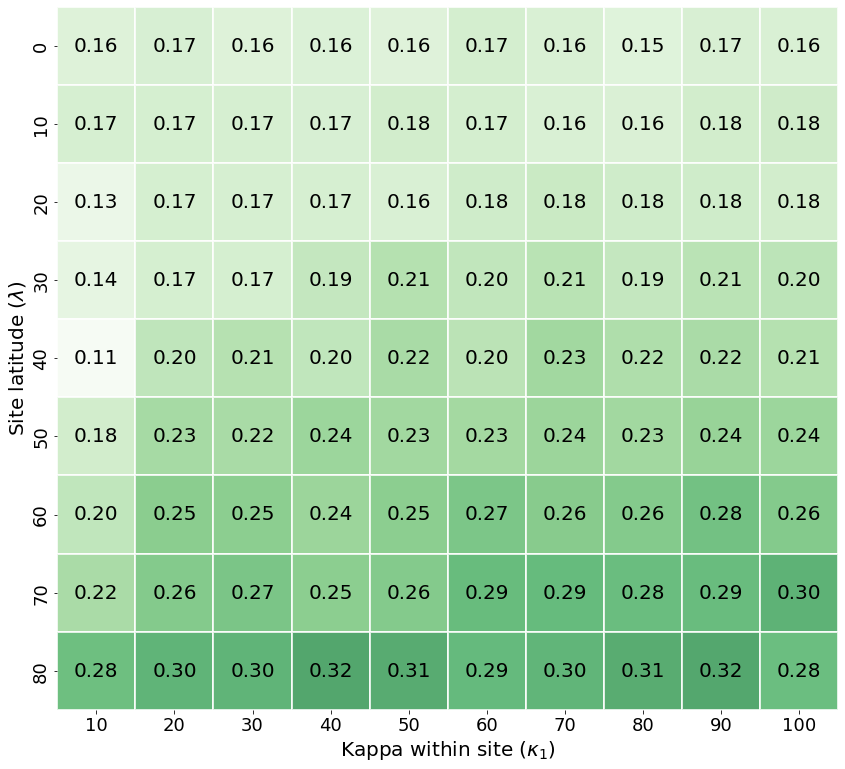

In [26]:
plt.figure(figsize=(14,14))
sns.heatmap(df_critical.pivot('site_lat', 'kappa_within_site', 'critical'), fmt=".2f",
            square=True, annot=True, linewidths=0.1, 
            vmin=0.1, vmax=0.4, cmap="Greens", alpha=0.8,
            cbar=False,
            cbar_kws = {'location': 'right', "boundaries":np.arange(0.12, 0.321, 0.02), "fraction": 0.04},
            annot_kws={"fontsize": 20, "color":'black'})
            # cmap=sns.color_palette("YlOrBr", as_cmap=True));

plt.ylabel("Site latitude ($\lambda$)", fontsize=20)
plt.xlabel("Kappa within site ($\kappa_1$)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.savefig("Figure3d.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3d.png", format="png", bbox_inches='tight')

In [48]:
critical_outlier_rate(df, 30, 10)

/tmp/ipykernel_667/1545544848.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_subset[df.k==1].sort_values(by="outlier_rate")
/tmp/ipykernel_667/1545544848.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df_subset[df.k==5].sort_values(by="outlier_rate")


0.1442952743023259

/tmp/ipykernel_735/3592756268.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_subset[df.k==1].sort_values(by="outlier_rate")
/tmp/ipykernel_735/3592756268.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df_subset[df.k==5].sort_values(by="outlier_rate")


<AxesSubplot:xlabel='outlier_rate', ylabel='error_angle_mean'>

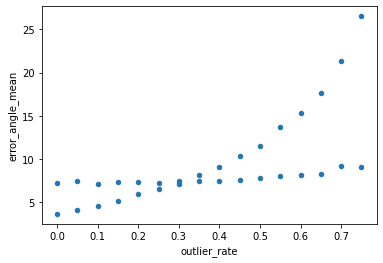

In [7]:
df_subset = df[(df.kappa_within_site==90) & (df.site_lat==80)]

df1 = df_subset[df.k==1].sort_values(by="outlier_rate")
df5 = df_subset[df.k==5].sort_values(by="outlier_rate")

fig, axes = plt.subplots()

df1.plot.scatter('outlier_rate', 'error_angle_mean', ax = axes)
df5.plot.scatter('outlier_rate', 'error_angle_mean', ax = axes)

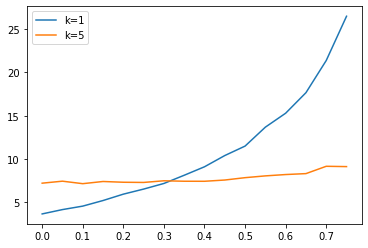

In [8]:
out_rate = df1.outlier_rate
error_1 = df1.error_angle_mean.values
error_5 = df5.error_angle_mean.values

plt.plot(out_rate, error_1, label="k=1")
plt.plot(out_rate, error_5, label="k=5")
plt.legend()

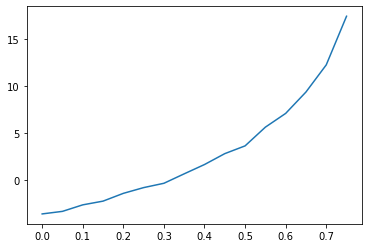

In [9]:
plt.plot(out_rate, error_1 - error_5, label="diff")

In [10]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [11]:
InterpolatedUnivariateSpline(out_rate, error_1-error_5).roots()

array([0.31748255])

In [12]:
outlier_rate = 0.1
df1 = df[(df.k==1) & (df.ignore_outliers==False) & (df.outlier_rate==outlier_rate)]
df5 = df[(df.k==5) & (df.ignore_outliers==True) & (df.outlier_rate==outlier_rate)]

# Filter 90 because those results look a little bit off
df1 = df1[df1.site_lat < 85]
df5 = df5[df5.site_lat < 85]
df5

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
54,0,5.095796,4.788230,9.980880,2.795028,50,10,5,10,20,0.0,0.1,G,NaN,True
107,0,8.230897,7.725080,15.990956,4.336672,50,10,5,10,60,0.0,0.1,G,NaN,True
114,0,6.766465,6.310283,13.437326,3.605920,50,10,5,60,70,0.0,0.1,G,NaN,True
137,0,7.869661,7.459712,15.373931,4.067523,50,10,5,30,80,0.0,0.1,G,NaN,True
138,0,7.099442,6.884070,13.630097,3.676414,50,10,5,100,80,0.0,0.1,G,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,0,9.461147,9.022862,18.420046,4.882024,50,10,5,10,80,0.0,0.1,G,NaN,True
2773,0,6.408434,6.095535,12.889362,3.387321,50,10,5,100,70,0.0,0.1,G,NaN,True
2775,0,5.580258,5.249040,10.765833,2.882189,50,10,5,20,40,0.0,0.1,G,NaN,True
2813,0,4.156173,3.906500,8.348994,2.273472,50,10,5,60,30,0.0,0.1,G,NaN,True


In [13]:
df1_tab = df1.pivot('kappa_within_site', 'site_lat', 'error_angle_mean')
df5_tab = df5.pivot('kappa_within_site', 'site_lat', 'error_angle_mean')

df_diff = df5_tab - df1_tab
df_diff = df_diff / df5_tab
df_diff

site_lat,0,10,20,30,40,50,60,70,80
kappa_within_site,,,,,,,,,
10,0.050232,0.072395,0.065189,0.073582,0.013611,0.100029,0.136424,0.188970,0.184899
20,0.140933,0.108194,0.118008,0.137200,0.159756,0.162810,0.193738,0.229960,0.239568
30,0.171865,0.184737,0.149650,0.173746,0.202616,0.231238,0.247840,0.248996,0.296639
40,0.139358,0.167174,0.193903,0.211961,0.196130,0.248737,0.272084,0.302720,0.319767
50,0.203592,0.149222,0.206914,0.205934,0.259353,0.268312,0.295471,0.303520,0.341888
60,0.166593,0.172312,0.190438,0.226144,0.238319,0.257383,0.298722,0.325649,0.310940
70,0.189813,0.187705,0.249427,0.234895,0.250281,0.249834,0.286900,0.354348,0.356893
80,0.222032,0.219560,0.245391,0.206648,0.238555,0.279176,0.307240,0.321186,0.365813
90,0.232618,0.237666,0.257209,0.255205,0.254619,0.272489,0.302441,0.326596,0.364308


In [14]:
from scipy.ndimage.filters import gaussian_filter

def contour_from_pandas(df_, a_max=15):

    X = df_.columns.values
    Y = df_.index.values
    Z = df_.values
    Z_smooth = gaussian_filter(Z, 1.0)
    
    Z_rounded = np.round(Z, 2)
    
    x,y = np.meshgrid(X, Y)

    bounds = np.arange(-0.5, 0.5, .1)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    # ax.set_aspect("equal")
    
    ColorGrid = ax.pcolormesh(x, y, Z_rounded, cmap="seismic_r", alpha=0.8, vmin=-.5, vmax=.5)
    # CS1 = ax.contour(x, y, Z, 10, colors='k', levels=np.arange(0.0, 16.0, 1.0))
    ContourLines = ax.contour(x, y, Z, 10, colors='k', levels=bounds)
    # CS2 = ax.pcolormesh(x, y, Z, cmap='viridis', alpha=0.8)
    
    ax.clabel(ContourLines, inline=True, fontsize=14)
    ax.set_xticks(df_.columns.values)
    ax.set_yticks(df_.index.values)
    ax.set_yscale("log")
    # ax.set_xlim([0, np.max(df_.columns.values)])
    # ax.set_ylim([0, np.max(df_.index.values)])
    ax.set_xlabel('Paleolatude')
    ax.set_ylabel('Kappa')
    cbar = plt.colorbar(ColorGrid, boundaries=bounds, fraction=0.02, location='right')
    cbar.set_label("Difference between means squared error", rotation=270)
     
    # plt.savefig("Figure1.png", dpi=300, format="png")

/tmp/ipykernel_735/1172950600.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


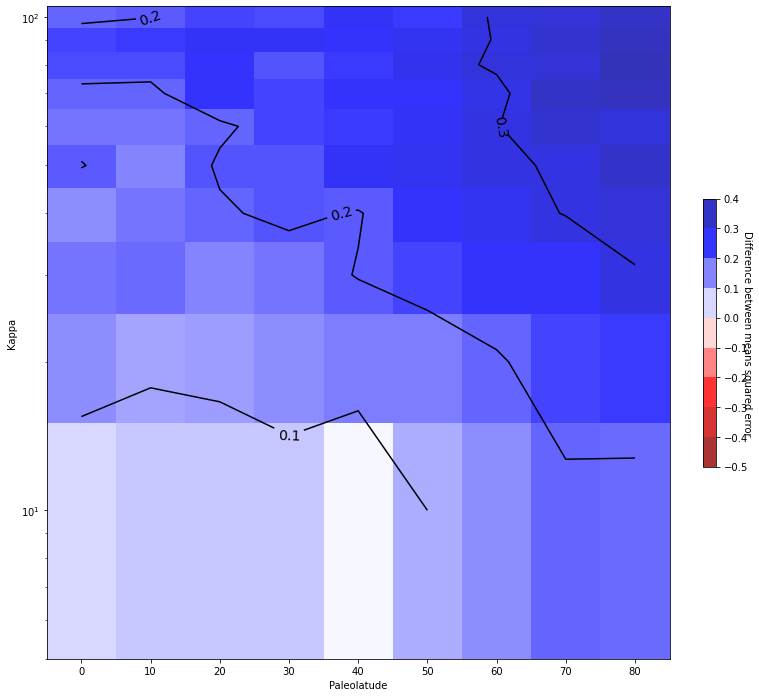

In [15]:
contour_from_pandas(df_diff)